### IS727272 - Cordero Hernández, Marco Ricardo

# Exercise 4.2.1 Banknote Authentication, Logistic Regression

Logistic Regression (LoR) belongs to the Supervised Learning classification. Then, the learning algorithm is the same as Linear Regression. There are three things that are different: 

    - Cost function
    - Prediction function
    - Performance measurement.

The LoR algorithm is as follows:

1. Load the dataset
2. Prepare data: add Bias or Ones' column and split dataset
3. Gradient Descent algorthim
4. Performance Measurement

## 1. Load Dataset: Banknote Authentication

The dataset used for this exercise can be downloaded from: https://archive.ics.uci.edu/ml/machine-learning-databases/00267/

Download the file: 'data_banknote_authentication.txt', and open it to observe how the data is distributed.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 1. Load dataset

df = pd.read_csv('./Datasets/data_banknote_authentication.csv', header = None)
data = np.array(df)
row, col = np.shape(data)
x = data[:, : col - 1]
y = data[:, -1]

y = y.reshape(-1, 1)

print('x:', np.shape(x))
print('y:', np.shape(y))

x: (1372, 4)
y: (1372, 1)


## 2. Prepare data

This step requires to add Bias, and then split dataset. We will define the Bias function to add the intercept column to the features matrix (input).

For spliting dataset we will use the train_test_split() function. Be sure to import the function before use it.

In [3]:
# 2. Prepare data: add Bias and split dataset
def Bias(X):
    row, col = np.shape(x)
    ones = np.ones(row)
    ones = ones.reshape(row, 1)
    X1 = np.concatenate((ones, X), axis = 1)
    return X1

x = Bias(x)

print('x shape: ', np.shape(x))

# SPLIT DATASET
test_size = 0.2
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))

x shape:  (1372, 5)
Split X 1372 rows into train with 1097 and test with 275
Split Y 1372 rows into train with 1097 and test with 275
xTrain shape: (1097, 5) yTrain shape: (1097, 1)
xTest shape: (275, 5) yTest shape: (275, 1)


## 3. Gradient Descent algorithm

As we learnt from previous lesson, the Gradient Descent (GD) consists in two main steps:

1. Calculate the gradient
2. Update the W values

We will add the cost calculation to evaluate the algorithm performance and W convergence.

The LoR algorithm will be implemented using the number of iterarions as the while condition ends.

We will define four functios to implement the GD algorithm:

1. Logistic: h(  )
2. Cost: cost(  )
3. Gradient: grad(  ) 
4. Gradient Descent: GD(  )

### 3.1 Logistic function 

The logistic function is implemented using the formula:
$$h(w, x) = \frac{1}{1+e^{-w^Tx}}$$


In [4]:
# 3.1 Logistic function

def h(x, w):
    return (1 / (1 + np.exp(-np.dot(w, x.T)))).T

### 3.2 Cost function

The cost function is defined by: 

$$
J(w) = -\frac{1}{m}\left(\sum_{i=1}^{m}y_i\ log[h(x_i, w)] + (1 - y_i)\ log[1 - h(x_i, w)] \right)
$$

In [5]:
# 3.2 Cost function

def cost(x, y, w):
    m, n = np.shape(y)
    '''_h = h(x, w)
    c1 = np.dot(1 - y, np.log(1 - _h))
    c2 = np.dot(y, np.log(_h))
    suma = c2 + c1
    c = -(1/m) * np.sum(suma) '''
    
    c = -(1/m) * np.sum(y * np.log(h(x, w)) + (1 - y) * np.log(1 - h(x, w)))
    
    return c

### 3.3 Gradient function

The gradient function is defined by:

$$
\frac{\partial J(w)}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x_i, w) - y_i) x_i[j] 
$$

The gradient for the vector form is: 


$$
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \frac{1}{m} X^T(h(X, w) - y) 
$$


In [6]:
# 3.3 Gradient function

def grad(x, y, w):
    m, n = np.shape(x)
    g = (1 / m) * np.dot(x.T, (h(x, w) - y))
    return g

### 3.4 Gradient Descent function

The GD function will be define with the next steps.

1. Initialize variables: it, costo, and J
2. While the actual iteration (it) is less than iterations:
    - Calculate the gradient
    - Calculate the cost
    - Update W
    - Store the cost in J
3. The GD function will return the W vector and J

In [7]:
# 3.4 Gradient Descent function

def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = []
    while it < its:
        # Gradient
        gradient = grad(x, y, w)
            
        #Cost function
        _cost = cost(x, y, w)
            
        #Updating w
        w = w - alpha * gradient.T
                
        #Storing cost
        J.append(_cost)
   
        it += 1
              
    return w, J

## Testing the Gradient Descent 

Initial Cost (training data): 0.6931471805599453
Cost after training (training data): 0.223036996762061
Cost after training (testing data): 0.2220009433757827
W: [[ 0.0640914  -0.58737159 -0.29453699 -0.23725079 -0.13062027]]


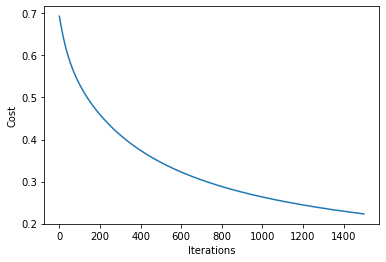

In [8]:
alpha = 0.001
its = 1500

m, n = np.shape(x)

w = np.zeros((1, n))


print('Initial Cost (training data):', cost(xTrain, yTrain, w))

# Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:', w)

# Plot the cost over the iterations
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost');

## 4. Performance Measurement

The accuracy for LoR is defined by:

$$ Acc = \frac{TP + TN}{m} $$


In [9]:
# 4. Accuracy

def accuracy(x, y, w):
    # Ynew = list(map(lambda _x: 1 if _x > 0.5 else 0, h(x, w)))
    
    h1 = h(x, w)
    Ynew = []
    
    for i in range(len(h1)):
        if h1[i] > 0.5:
            Ynew.append(1)
        else:
            Ynew.append(0)
    
    Ynew = np.array(Ynew)
    Ynew = Ynew.reshape(-1, 1)
    
    suma = (y == Ynew).sum()
    a = suma/len(y)
    
    return a, suma

accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))

Training accuracy: 0.9453053783044667 1037 out of 1097
Testing accuracy: 0.9272727272727272 255 out of 275
